## Implementing K-means for cookie data set 

In [81]:
import pandas as pd
import numpy as np

# Import sklearn modules
from sklearn.preprocessing import LabelEncoder

In [82]:
df = pd.read_excel("cookie_table.xlsx")

#### Inspecting the data 

1. finding NA 
2. types of data 
3. check column names

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 22 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name of the cookie                                                       66 non-null     object 
 1   Nickname of the evaluator (anonymous)                                    64 non-null     object 
 2   vegan (yes/no)                                                           56 non-null     object 
 3   no of Ingredients                                                        29 non-null     float64
 4   Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)      66 non-null     int64  
 5   Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)  66 non-null     int64  
 6   Crumble Factor (1, not crumble 10 tooooo much crumble)                   60 

In [84]:
df.columns

Index(['Name of the cookie', 'Nickname of the evaluator (anonymous)',
       'vegan (yes/no)', 'no of Ingredients',
       'Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)',
       'Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)',
       'Crumble Factor (1, not crumble 10 tooooo much crumble)',
       'Stickiness (0 no, 1 yes)',
       'Appereance (1, is this a cookie? - 10 this cookie is art)',
       'Contains chocolate (0 no, 1 yes)',
       'Creativity(1, plain - I have never eaten such a cookie 10)', 'shape',
       'color', 'moisture (1=dry, 10=moist)', 'salty', 'nutty',
       'spiced (w/ Cinnamon, cloves, ginger etc, yes or no)',
       'Overall Score (1 to 10)', 'coconut', 'Aroma',
       'Allergensm (flour, eggs, nuts etc., yes or no)', 'burnt'],
      dtype='object')

In [85]:
df.describe()

,no of Ingredients,"Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)","Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)","Crumble Factor (1, not crumble 10 tooooo much crumble)","Appereance (1, is this a cookie? - 10 this cookie is art)","Contains chocolate (0 no, 1 yes)","Creativity(1, plain - I have never eaten such a cookie 10)","moisture (1=dry, 10=moist)",Overall Score (1 to 10)
count,29.000000,66.000000,66.000000,60.000000,66.000000,65.000000,65.000000,61.000000,64.000000
mean,7.724138,5.469697,4.696970,5.033333,6.818182,0.615385,5.246154,4.934426,7.109375
std,2.218374,1.807844,2.183643,1.868260,1.779448,0.490290,1.620482,2.293969,1.523542
min,6.000000,2.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,2.000000
25%,7.000000,4.000000,3.000000,4.000000,5.000000,0.000000,4.000000,3.000000,6.000000
50%,8.000000,5.000000,5.000000,5.000000,7.000000,1.000000,5.000000,5.000000,7.500000
75%,8.000000,7.000000,6.000000,6.000000,8.000000,1.000000,6.000000,7.000000,8.000000
max,18.000000,10.000000,10.000000,9.000000,10.000000,1.000000,9.000000,10.000000,9.000000


#### Results of inspecting 

1. non numerical data involved, has to be deleted 
2. data types dont match 
3. names have to be cleaned 
4. we have NA to deal with 

#### Cleaning the data 

In [86]:
# Clean column names by removing everything inside parentheses and the parentheses themselves
df.columns = (
    df.columns
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove text inside parentheses, including the parentheses
    .str.strip()  # Remove leading/trailing whitespace
    .str.replace(" ", "_")  # Replace spaces with underscores
    .str.lower()  # Convert to lowercase
)

# Display cleaned column names
print(df.columns)

Index(['name_of_the_cookie', 'nickname_of_the_evaluator', 'vegan',
       'no_of_ingredients', 'sweetness_factor', 'crunch_factor',
       'crumble_factor', 'stickiness', 'appereance', 'contains_chocolate',
       'creativity', 'shape', 'color', 'moisture', 'salty', 'nutty', 'spiced',
       'overall_score', 'coconut', 'aroma', 'allergensm', 'burnt'],
      dtype='object')


In [87]:
# Drop the 'nickname_of_the_evaluator' column
df = df.drop(columns=['nickname_of_the_evaluator'])

In [88]:
# Lowercase all string values in the DataFrame
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

# Convert 'yes'/'no' values to 1/0 in all applicable columns
df = df.replace({'yes': 1, 'no': 0})

# Convert 'normal' values to 1 in the 'shape' column
df = df.replace({'normal': 1})

# Clean the 'shape' and 'color' columns
df['shape'] = df['shape'].replace('cricle', 'circle')
df['shape'] = df['shape'].replace('', 'nan')
df['color'] = df['color'].replace('whtile', 'white')
df['color'] = df['color'].replace('', 'nan')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'color' column
df['color'] = label_encoder.fit_transform(df['color'])
df['shape'] = label_encoder.fit_transform(df['shape'])

# Verify the changes
df.head()

C:\Users\lucag\AppData\Local\Temp\ipykernel_3536\1284044854.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)
C:\Users\lucag\AppData\Local\Temp\ipykernel_3536\1284044854.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0})
C:\Users\lucag\AppData\Local\Temp\ipykernel_3536\1284044854.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'normal': 1})


,name_of_the_cookie,vegan,no_of_ingredients,sweetness_factor,crunch_factor,crumble_factor,stickiness,appereance,contains_chocolate,creativity,...,color,moisture,salty,nutty,spiced,overall_score,coconut,aroma,allergensm,burnt
0,jacobsen (black),NaN,NaN,3,6,5.0,0.0,9,1.0,6.0,...,3,4.0,NaN,1.0,0.0,7.0,NaN,NaN,NaN,NaN
1,x-mas,1.0,8.0,7,6,NaN,0.0,8,1.0,5.0,...,2,4.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0
2,jacobsen (black),NaN,NaN,4,5,8.0,0.0,9,1.0,5.0,...,1,3.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0
3,i've tried my best,1.0,NaN,5,2,NaN,0.0,8,0.0,NaN,...,8,8.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0
4,chatgpt chocolate cookie,1.0,7.0,7,2,4.0,0.0,7,1.0,5.0,...,2,8.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0


In [89]:
# Convert columns with numbers to float first to handle NaNs
numeric_columns = df.select_dtypes(include=['object']).columns

for col in numeric_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass

# Fill NaNs with the mean of the column and convert to int
df = df.apply(lambda x: x.fillna(x.mean()).astype(int) if x.dtype.kind in 'biufc' else x)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name_of_the_cookie  66 non-null     object
 1   vegan               66 non-null     int32 
 2   no_of_ingredients   66 non-null     int32 
 3   sweetness_factor    66 non-null     int32 
 4   crunch_factor       66 non-null     int32 
 5   crumble_factor      66 non-null     int32 
 6   stickiness          66 non-null     int32 
 7   appereance          66 non-null     int32 
 8   contains_chocolate  66 non-null     int32 
 9   creativity          66 non-null     int32 
 10  shape               66 non-null     int32 
 11  color               66 non-null     int32 
 12  moisture            66 non-null     int32 
 13  salty               66 non-null     int32 
 14  nutty               66 non-null     int32 
 15  spiced              66 non-null     int32 
 16  overall_score       66 non-n

In [90]:
df.head()

,name_of_the_cookie,vegan,no_of_ingredients,sweetness_factor,crunch_factor,crumble_factor,stickiness,appereance,contains_chocolate,creativity,...,color,moisture,salty,nutty,spiced,overall_score,coconut,aroma,allergensm,burnt
0,jacobsen (black),0,7,3,6,5,0,9,1,6,...,3,4,0,1,0,7,0,0,0,0
1,x-mas,1,8,7,6,5,0,8,1,5,...,2,4,0,0,0,7,0,0,1,0
2,jacobsen (black),0,7,4,5,8,0,9,1,5,...,1,3,0,1,0,9,0,0,0,0
3,i've tried my best,1,7,5,2,5,0,8,0,5,...,8,8,0,0,0,9,1,0,0,0
4,chatgpt chocolate cookie,1,7,7,2,4,0,7,1,5,...,2,8,0,0,0,7,0,1,0,0


#### Preparing the kmeans algorithm 

In [91]:
# Features to include in k-means clustering
features = [
    "no_of_ingredients", "sweetness_factor", "crunch_factor", "crumble_factor",
    "stickiness", "appereance", "creativity", "moisture", "overall_score"
]

# Select the subset of the data containing only the chosen features
data = df[features].copy()

# Display the resulting dataset
data.head()


,no_of_ingredients,sweetness_factor,crunch_factor,crumble_factor,stickiness,appereance,creativity,moisture,overall_score
0,7,3,6,5,0,9,6,4,7
1,8,7,6,5,0,8,5,4,7
2,7,4,5,8,0,9,5,3,9
3,7,5,2,5,0,8,5,8,9
4,7,7,2,4,0,7,5,8,7


In [92]:
# Normalize the data on a scale of 1-10
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [93]:
data.describe()

,no_of_ingredients,sweetness_factor,crunch_factor,crumble_factor,stickiness,appereance,creativity,moisture,overall_score
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2.098485,5.337121,5.107744,6.037879,3.121212,6.454545,5.632035,5.292929,8.294372
std,1.250291,2.259804,2.426270,2.224964,4.119429,2.542068,2.297505,2.464459,2.142913
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.833333,3.500000,3.222222,4.750000,1.000000,3.857143,3.857143,3.222222,6.714286
50%,1.833333,4.750000,5.444444,6.000000,1.000000,6.714286,5.285714,4.888889,8.142857
75%,1.833333,7.250000,6.555556,7.250000,1.000000,8.142857,6.714286,7.666667,9.571429
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


#### Implementing centroids

##### Function `random_centroids`

The `random_centroids` function is used to create **random starting centroids** for the k-means algorithm. A centroid is a point in the data space that represents the center of a cluster. Here's how the function works:

1. **Input Parameters:**
   - `data`: The dataset from which clusters will be formed (e.g., a DataFrame).
   - `k`: The number of clusters (and therefore the number of centroids) to create.

2. **What Happens in the Function?**
   - An empty list `centroids` is created to store the centroids.
   - For each centroid to be created (`k` times):
     - A random value is selected from **each column** in the dataset.
     - These random values form one centroid (a data point).
     - The centroid is added to the list.
   - Finally, all `k` centroids are combined into a table (DataFrame) and returned.

3. **Result:**
   - The function returns a table where each column represents one centroid.
   - These random starting centroids are then used by the k-means algorithm to compute clusters.

---

##### Example

Imagine your dataset looks like this:

| Feature1 | Feature2 |
|----------|----------|
| 1.0      | 2.0      |
| 3.0      | 4.0      |
| 5.0      | 6.0      |

If you want to create `k=2` clusters, the function randomly selects values from the columns and might output:

| Centroid1 | Centroid2 |
|-----------|-----------|
| 1.0       | 5.0       |
| 4.0       | 2.0       |

These values serve as **starting points** for the k-means clustering.

---

##### Why Is This Done?
- k-means requires initial values (centroids) to begin calculating clusters.
- This function generates random starting values directly from your dataset.


In [94]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [95]:
centroids = random_centroids(data, 5)

C:\Users\lucag\AppData\Local\Temp\ipykernel_3536\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [96]:
centroids

,0,1,2,3,4
no_of_ingredients,1.833333,1.000000,1.833333,1.833333,1.833333
sweetness_factor,4.750000,6.000000,4.750000,2.250000,6.000000
crunch_factor,6.555556,7.666667,6.555556,6.555556,6.555556
crumble_factor,4.750000,9.750000,6.000000,7.250000,2.250000
stickiness,1.000000,1.000000,11.000000,1.000000,1.000000
appereance,3.857143,1.000000,11.000000,9.571429,6.714286
creativity,6.714286,6.714286,8.142857,6.714286,3.857143
moisture,1.000000,7.666667,3.222222,4.333333,8.777778
overall_score,6.714286,9.571429,8.142857,6.714286,11.000000



### Function `get_labels`

The `get_labels` function assigns each data point in the dataset to the nearest centroid. This is a crucial step in the k-means algorithm for clustering. Here’s how it works:

---

##### **Function Explanation**

1. **Input Parameters:**
   - `data`: The dataset containing the data points to be clustered (e.g., a DataFrame).
   - `centroids`: The current centroids of the clusters (e.g., a DataFrame where each column represents a centroid).

2. **Process:**
   - For each centroid, the **Euclidean distance** to all data points is calculated:
     ```python
     distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
     ```
     - `data - x`: Subtracts the centroid values (`x`) from each data point in the dataset.
     - `** 2`: Squares the differences.
     - `.sum(axis=1)`: Sums the squared differences for each data point (across all features).
     - `np.sqrt(...)`: Takes the square root of the summed differences to get the Euclidean distance.

   - The result is a DataFrame (`distances`) where:
     - Each row corresponds to a data point.
     - Each column corresponds to a centroid.
     - Each value is the distance between a data point and a centroid.

   - For each data point, the function finds the index of the **closest centroid**:
     ```python
     return distances.idxmin(axis=1)
     ```
     - `.idxmin(axis=1)` identifies the column (centroid) with the smallest distance for each row (data point).

3. **Output:**
   - The function returns a Series (`labels`) where:
     - Each row corresponds to a data point.
     - Each value indicates the index of the closest centroid.

---

##### **Usage in Code**

1. **Assign Labels:**
   ```python
   labels = get_labels(data, centroids)


In [97]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [98]:
labels = get_labels(data, centroids)

In [99]:
labels.value_counts()

3    19
0    17
4    14
2    13
1     3
Name: count, dtype: int64

### Function `new_centroids`

The `new_centroids` function recalculates the centroids for each cluster. This is a key step in the k-means algorithm, as the centroids are updated based on the current cluster assignments.

---

##### **Function Explanation**

1. **Input Parameters:**
   - `data`: The dataset containing the data points (e.g., a DataFrame).
   - `labels`: A Series or array where each data point is assigned a cluster label (e.g., from the `get_labels` function).
   - `k`: The number of clusters.

2. **Process:**
   - The function groups the data points by their cluster labels:
     ```python
     data.groupby(labels)
     ```
     - This creates groups of data points where each group corresponds to one cluster.

   - For each cluster, the function calculates the **geometric mean** of the data points:
     ```python
     lambda x: np.exp(np.log(x).mean())
     ```
     - `np.log(x)`: Takes the natural logarithm of each data point in the cluster.
     - `.mean()`: Computes the mean of the logarithmic values.
     - `np.exp(...)`: Applies the exponential function to the mean to convert it back to the original scale. This results in the geometric mean.

   - The `.apply()` method applies this calculation to each cluster.

   - The `.T` transposes the resulting DataFrame so that the new centroids are columns, making them easier to use in the next iteration.

3. **Output:**
   - The function returns a new DataFrame `centroids` where:
     - Each column represents a cluster (centroid).
     - Each row represents a feature of the centroid.

---

##### **Key Steps in k-means**
- This function updates the centroid positions by computing the **geometric mean** of all data points assigned to each cluster.
- The new centroids are used in the next iteration of k-means until the centroids stabilize.

---

##### **Example**

Suppose we have the following data:

| Feature1 | Feature2 | ClusterLabel |
|----------|----------|--------------|
| 1.0      | 2.0      | 0            |
| 2.0      | 3.0      | 0            |
| 5.0      | 6.0      | 1            |
| 6.0      | 7.0      | 1            |

The function groups the data points by their labels (`ClusterLabel`) and calculates the geometric mean for each cluster:

**Cluster 0:**
- Geometric mean for `Feature1`: 
  \[
  \exp\left(\frac{\ln(1.0) + \ln(2.0)}{2}\right) = 1.414
  \]
- Geometric mean for `Feature2`: 
  \[
  \exp\left(\frac{\ln(2.0) + \ln(3.0)}{2}\right) = 2.449
  \]

**Cluster 1:**
- Geometric mean for `Feature1`: 
  \[
  \exp\left(\frac{\ln(5.0) + \ln(6.0)}{2}\right) = 5.477
  \]
- Geometric mean for `Feature2`: 
  \[
  \exp\left(\frac{\ln(6.0) + \ln(7.0)}{2}\right) = 6.480
  \]

Resulting centroids:

| Feature1 | Feature2 |
|----------|----------|
| 1.414    | 2.449    |
| 5.477    | 6.480    |

---

##### **Purpose**
This function ensures that the centroids are updated based on the current clusters, helping the k-means algorithm converge. The use of the geometric mean can be particularly useful when the data contains skewed distributions or multiplicative relationships.


In [100]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [101]:
#imports for next steps
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Function `plot_clusters` and PCA

The `plot_clusters` function visualizes the current state of the k-means clustering process by plotting the data points and centroids in a 2D space. It provides a clear representation of how clusters are distributed and how centroids are updated over iterations.

---

##### **Function Explanation**

1. **Input Parameters:**
   - `data`: The dataset containing the data points to be clustered (e.g., a DataFrame or array).
   - `labels`: The cluster labels for each data point (e.g., from the `get_labels` function).
   - `centroids`: The current centroids of the clusters (e.g., a DataFrame where each column represents a centroid).
   - `iteration`: The current iteration number (used for labeling the plot).

2. **Process:**
   - **Dimensionality Reduction:**
     - The function uses Principal Component Analysis (PCA) to reduce the data and centroids to 2D for visualization:
       ```python
       pca = PCA(n_components=2)
       data_2d = pca.fit_transform(data)
       centroids_2d = pca.transform(centroids.T)
       ```
       - `data_2d`: The dataset transformed into 2D space.
       - `centroids_2d`: The centroids transformed into the same 2D space.
     - PCA ensures that the visualization works even if the dataset has more than two features.

   - **Visualization:**
     - Clears the previous plot to update the visualization for the current iteration:
       ```python
       clear_output(wait=True)
       ```
     - Sets the plot title to indicate the iteration:
       ```python
       plt.title(f'Iteration {iteration}')
       ```
     - Plots the data points in 2D, coloring them based on their cluster labels:
       ```python
       plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
       ```
     - Overlays the centroids on the same plot:
       ```python
       plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
       ```
     - Displays the plot:
       ```python
       plt.show()
       ```

---

##### **Output:**
- A scatter plot showing:
  - **Data points** (in 2D space) colored by their assigned cluster label.
  - **Centroids** as distinct points, indicating the centers of the clusters.
  - A **title** with the iteration number.

---

##### **Example:**

If the dataset has 3 clusters and the process is in **iteration 5**, the function might display a plot like this:

- **Data points** grouped into 3 clusters, with each cluster in a different color.
- **Centroids** plotted as larger or differently styled points at the center of each cluster.
- The title: "Iteration 5".

---

##### **Purpose**
This function helps visually track the progress of the k-means clustering process:
- Shows how data points are grouped into clusters.
- Highlights how centroids shift over iterations.
- Provides insights into the convergence of the clustering algorithm.

This visualization is particularly useful for debugging, understanding, and presenting clustering results.


In [102]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

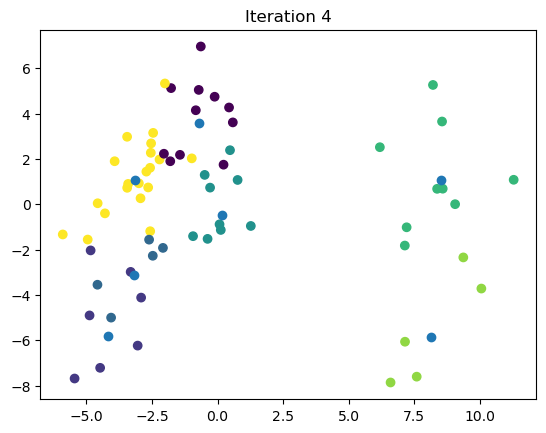

In [114]:
#finally run the k-means clustering algorithm
max_iterations = 100
centroid_count = 7

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [104]:
# show the final centroids
centroids


,0,1,2,3
no_of_ingredients,2.203738,1.692770,1.987672,1.879482
sweetness_factor,3.493528,5.909821,6.380366,4.840878
crunch_factor,7.030366,3.246720,6.464782,2.738753
crumble_factor,7.012518,4.461105,8.124093,4.071884
stickiness,1.000000,1.000000,1.000000,11.000000
appereance,7.091761,6.490044,3.075163,5.147303
creativity,6.412966,4.684857,2.689242,5.692558
moisture,3.906802,5.349360,2.558209,6.807635
overall_score,8.590504,8.930929,4.394726,7.740332


In [105]:
# n of cookies in each cluster
labels.value_counts()

0    23
1    21
3    14
2     8
Name: count, dtype: int64

In [106]:
# you can "return" to the "original" table with original scales to determine which cookies are in each cluster and what they might have in common 
cookies[labels == 0]

,Name of the cookie,Nickname of the evaluator (anonymous),vegan (yes/no),no of Ingredients,"Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)","Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)","Crumble Factor (1, not crumble 10 tooooo much crumble)","Stickiness (0 no, 1 yes)","Appereance (1, is this a cookie? - 10 this cookie is art)","Contains chocolate (0 no, 1 yes)",...,color,"moisture (1=dry, 10=moist)",salty,nutty,"spiced (w/ Cinnamon, cloves, ginger etc, yes or no)",Overall Score (1 to 10),coconut,Aroma,"Allergensm (flour, eggs, nuts etc., yes or no)",burnt
0,Jacobsen (black),Keks,NaN,NaN,3,6,5.0,0,9,1.0,...,Brown and green,4.0,NaN,yes,No,7.0,NaN,NaN,NaN,NaN
1,X-MAS,Dr Cookie,yes,8.0,7,6,NaN,0,8,1.0,...,brown,4.0,no,no,no,NaN,no,no,yes,0
2,Jacobsen (black),CookieMonster,NaN,NaN,4,5,8.0,0,9,1.0,...,black & white,3.0,no,yes,no,9.0,no,no,no,0
8,Jacobsen (black),FBT,no,NaN,3,6,4.0,0,10,1.0,...,brown,7.0,no,NaN,NaN,8.0,NaN,NaN,NaN,NaN
9,X-MAS,cookie_expert,yes,8.0,6,8,NaN,0,8,1.0,...,brown,NaN,no,no,yes,7.0,no,NaN,yes,NaN
10,Jacobsen (white),KrümelMonster,no,NaN,2,7,NaN,0,8,1.0,...,NaN,5.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
11,snickerdoodle cookies,KrümelMonster,no,NaN,4,7,7.0,0,7,0.0,...,brown,2.0,no,no,no,6.0,NaN,NaN,NaN,NaN
13,snickerdoodle cookies,SweetTooth,no,NaN,4,5,5.0,0,6,0.0,...,brown,6.0,no,no,no,7.0,no,no,NaN,0
19,X-MAS,cookie_master,yes,8.0,4,7,7.0,0,7,1.0,...,brown,4.0,no,no,yes,7.0,no,NaN,yes,0
24,X-Mas,CookieMonster,yes,8.0,3,10,5.0,0,6,1.0,...,light brown,2.0,no,no,yes,6.0,no,no,yes,NaN


#### Issue here: 

Data is not distinct per cookie. Normally you would have one entry per entitiy that you examine. Thats not the case here, because the dataset was bad. Nonetheless the algorithms works and converges really quick because there is so few data. 
Its a very clever unsupervised learning algorithm and it might be helpful to find similarities and difference in and between clusters. 